In [1]:
from sympy import *
import matplotlib.pyplot as plt

In [7]:
def GradientDescent(f,variables,init_values,rate):
    
    #declare tolerance
    tol = 0.001
    
    #initialize norm to some value greater than tolerance
    norm = 10
    
    #list to store function's value at each point during iteration
    func_values = []
    func_values.append(evalFunc(f,variables,init_values))
    
    #list to count number of iterations
    iter_count = []
    i = 1
    iter_count.append(i)
    
    #loop until norm < tol
    while norm > tol or norm < -tol:
        
        if(i > 30000): break
        
        #partial differential list to store partial diff of f wrt each element of 'variables' list at the point init_values
        partial = []
        
        #find partial diff values at init_values
        j = 0
        while j < len(variables):
            curr = variables[j]
            partial.append(findDiff(f,variables,curr,init_values))
            j += 1
        
        #move by an amount of rate * partialDiff(f) wrt the corresponding variable
        j = 0
        while j < len(init_values):
            init_values[j] += - rate * partial[j]
            j += 1
        
        func_values.append(evalFunc(f,variables,init_values))
        i += 1
        iter_count.append(i)
        # find norm   
        j = 0
        sq_sum = 0
        while j < len(init_values):
            sq_sum += partial[j]**2
            j += 1
        
        norm = sq_sum**0.5
    
    plt.plot(iter_count,func_values)
    plt.ylabel("Function Value")
    plt.xlabel("Iterations")
    plt.title("Function Value vs Iterations")
    
    return init_values

In [3]:
#function to evaluate f at a point denoted by 'values' list
def evalFunc(f,variables,values):
    i = 0
    for x in variables :
        f = f.subs(x,values[i])
        i += 1
    return f.evalf()

#function to find value of partial derivative of f at point 'values' wrt variable 'wrt_this'
def findDiff(f,variables,wrt_this,values):
    g = f.diff(wrt_this)
    i = 0
    for x in variables :
        g = g.subs(x,values[i])
        i += 1
    return g.evalf()

Optimal Point: 
x = 2.00043006057885, y = 4.00021503028942
Optimal Value: 
f(x,y) = 2.31190126846126e-7


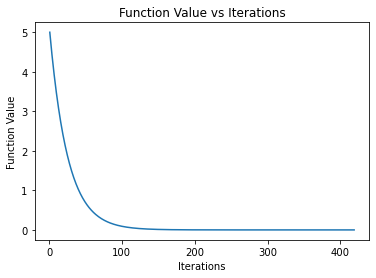

In [14]:
x,y = symbols('x y')
f = (x-2)**2 + (y-4)**2
variables = [x,y]
init_values = [4,5]
rate = 0.01

ans = GradientDescent(f,variables,init_values,rate)
print("Optimal Point: ")
print("x = " + str(ans[0]) +", y = " + str(ans[1]))
print("Optimal Value: ")
print("f(x,y) = " + str(evalFunc(f,variables,ans)))